这是《跟着AI学可视化》的第一节课的内容

Developed by [李鲁鲁](https://github.com/LC1332)

目前项目施工地址 https://github.com/LC1332/visualization-with-ai


我们计划在这个notebook中实现plotly

- Scatter、Line、Bar等基础图表
- make_subplots、多行多列布局
- hover、zoom、pan等

# 把prompt直接输入 gemini

在这个notebook中我们尽量不直接进行代码的写作，而是使用prompt生成代码

比如我们想先看一个plotly的例子

```
给我一段plotly画图的例子代码

要左右两个子图 左边是折线图，右边是直方图
```

那这个时候增加一个代码的cell，然后把prompt输入进去

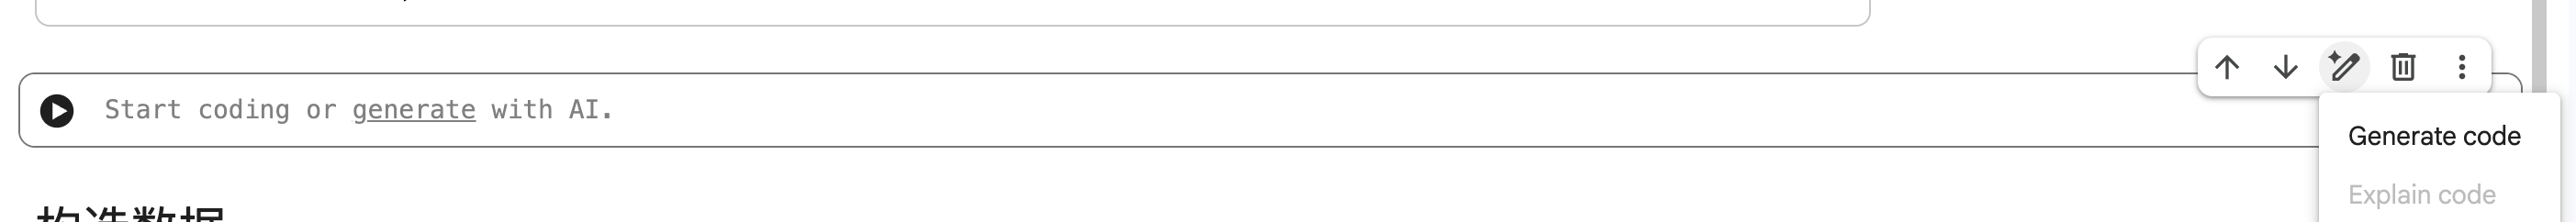

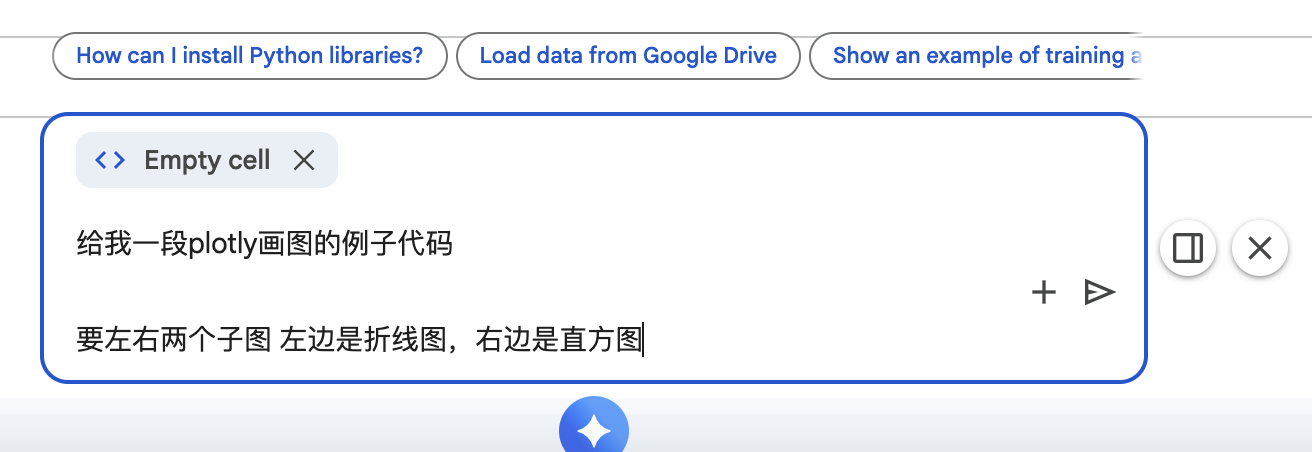

In [15]:
# 下面是AI生成的代码

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Generate some dummy data
x_data = np.arange(0, 10, 0.1)
y_data = np.sin(x_data)
hist_data = np.random.randn(500) # Random data for histogram

# Create subplots: 1 row, 2 columns
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Line Chart', 'Histogram'))

# Add a line chart to the left subplot
fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines', name='Sine Wave'),
              row=1, col=1)

# Add a histogram to the right subplot
fig.add_trace(go.Histogram(x=hist_data, name='Random Data Distribution'),
              row=1, col=2)

# Update layout for overall title and specific subplot titles
fig.update_layout(title_text='Plotly Example: Line Chart and Histogram Subplots')

# Display the figure
fig.show()

 可以看到直接就能画出图了。

 原则上来说 我们已经完成了这个课程80%的知识内容。你已经成功画出图表了

 那接下来你就可以根据自己生活中的数据进行绘图了。

# 构造数据

这里我希望随机构造6个股票在一段时间内的日平均数据
- 股票的名字分别为大庆石油，可口可乐，迪士尼，摩托罗拉，王府井百货，顶新食品
- 这些股票的初始价格都是100， 然后会在80天内，以每天增加一个标准正态分布随机变量的方式随机游走
- 数据格式是一个list of dict, 每个元素包含 name(string), dates(list), prices(list) 三个字段

In [16]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Stock names
stock_names = [
    '大庆石油', '可口可乐', '迪士尼',
    '摩托罗拉', '王府井百货', '顶新食品'
]

# Simulation parameters
initial_price = 100
num_days = 80

# List to hold all stock data
all_stock_data = []

# Generate data for each stock
for name in stock_names:
    prices = [initial_price]
    dates = [datetime.now() - timedelta(days=num_days - 1)] # Start date

    for i in range(1, num_days):
        # Random walk: add a standard normal random variable
        new_price = prices[-1] + np.random.randn()
        prices.append(max(0, new_price)) # Ensure price doesn't go below 0
        dates.append(dates[-1] + timedelta(days=1))

    # Format dates as strings for readability
    formatted_dates = [d.strftime('%Y-%m-%d') for d in dates]

    stock_info = {
        'name': name,
        'dates': formatted_dates,
        'prices': prices
    }
    all_stock_data.append(stock_info)

# Display the first stock's data as an example
print(f"Generated data for {len(all_stock_data)} stocks.")
print("Example data for the first stock:")
print(all_stock_data[0])


Generated data for 6 stocks.
Example data for the first stock:
{'name': '大庆石油', 'dates': ['2025-08-30', '2025-08-31', '2025-09-01', '2025-09-02', '2025-09-03', '2025-09-04', '2025-09-05', '2025-09-06', '2025-09-07', '2025-09-08', '2025-09-09', '2025-09-10', '2025-09-11', '2025-09-12', '2025-09-13', '2025-09-14', '2025-09-15', '2025-09-16', '2025-09-17', '2025-09-18', '2025-09-19', '2025-09-20', '2025-09-21', '2025-09-22', '2025-09-23', '2025-09-24', '2025-09-25', '2025-09-26', '2025-09-27', '2025-09-28', '2025-09-29', '2025-09-30', '2025-10-01', '2025-10-02', '2025-10-03', '2025-10-04', '2025-10-05', '2025-10-06', '2025-10-07', '2025-10-08', '2025-10-09', '2025-10-10', '2025-10-11', '2025-10-12', '2025-10-13', '2025-10-14', '2025-10-15', '2025-10-16', '2025-10-17', '2025-10-18', '2025-10-19', '2025-10-20', '2025-10-21', '2025-10-22', '2025-10-23', '2025-10-24', '2025-10-25', '2025-10-26', '2025-10-27', '2025-10-28', '2025-10-29', '2025-10-30', '2025-10-31', '2025-11-01', '2025-11-02', 

# 绘制数据

这里我们假设两个场景，假设你是在colab环境里面，那这个时候gemini实际上会自动读取你的上下文，这个时候他知道all_stock_data的数据是怎么来的。

你可以直接尝试下面的prompt

```
用plotly折线图画出all_stock_data的数据
```

In [17]:
import plotly.graph_objects as go

# Create a new figure
fig = go.Figure()

# Add a trace for each stock
for stock in all_stock_data:
    fig.add_trace(go.Scatter(x=stock['dates'], y=stock['prices'],
                             mode='lines+markers',
                             name=stock['name'],
                             hovertemplate=
                             '<b>股票</b>: %{full_name}<br>'+  # Use full_name for legend group name
                             '<b>日期</b>: %{x}<br>'+
                             '<b>价格</b>: %{y:.2f}<extra></extra>')) # Format price to 2 decimal places

# Update layout for title and axis labels
fig.update_layout(title_text='模拟股票价格走势图',
                  xaxis_title='日期',
                  yaxis_title='价格',
                  hovermode='x unified') # Unified hover across all traces

# Show the figure
fig.show()

这里我保留了gemini错误的代码，实际上他给我的template是错的，删掉这个template

可视化的效果要好得多

In [18]:
import plotly.graph_objects as go

# Create a new figure
fig = go.Figure()

# Add a trace for each stock
for stock in all_stock_data:
    fig.add_trace(go.Scatter(x=stock['dates'], y=stock['prices'],
                             mode='lines+markers',
                             name=stock['name'],)) # Format price to 2 decimal places

# Update layout for title and axis labels
fig.update_layout(title_text='模拟股票价格走势图',
                  xaxis_title='日期',
                  yaxis_title='价格',
                  hovermode='x unified') # Unified hover across all traces

# Show the figure
fig.show()

# 假如我们不在colab里面工作

当然我们有时候也不是在colab环境下进行工作

那这个时候我们可以用这个prompt

```
all_stock_data是一个list of dict
每个元素有三个字段name(string), dates(list), prices(list)

我希望实现一个plotly的折线图绘制每个股票的价格
- 横轴是时间，纵轴是价格

<code>
{all_stock_data的代码}
</code>
```

比如把这个prompt输入deepseek，可以得到

In [19]:
import plotly.graph_objects as go
import plotly.express as px

def plot_stock_prices(all_stock_data, title="股票价格走势图"):
    """
    绘制所有股票的价格走势图

    Parameters:
    all_stock_data: list of dict, 每个字典包含'name', 'dates', 'prices'
    title: str, 图表标题
    """
    # 创建图表
    fig = go.Figure()

    # 为每只股票添加折线
    for stock in all_stock_data:
        fig.add_trace(go.Scatter(
            x=stock['dates'],
            y=stock['prices'],
            mode='lines',
            name=stock['name'],
            hovertemplate=(
                f"{stock['name']}<br>"
                "日期: %{x}<br>"
                "价格: %{y:.2f}<br>"
                "<extra></extra>"
            )
        ))

    # 更新图表布局
    fig.update_layout(
        title=dict(
            text=title,
            x=0.5,
            xanchor='center',
            font=dict(size=20)
        ),
        xaxis=dict(
            title='日期',
            tickangle=45,
            type='category',  # 对于日期字符串，使用category类型
            tickmode='auto',
            nticks=20
        ),
        yaxis=dict(
            title='价格',
            tickformat='.2f'
        ),
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        ),
        hovermode='x unified',
        width=1000,
        height=600,
        template='plotly_white'
    )

    # 显示图表
    fig.show()

    return fig

# 使用示例
if __name__ == "__main__":
    # 使用您提供的数据生成代码
    # import numpy as np
    # import pandas as pd
    # from datetime import datetime, timedelta

    # # Stock names
    # stock_names = [
    #     '大庆石油', '可口可乐', '迪士尼',
    #     '摩托罗拉', '王府井百货', '顶新食品'
    # ]

    # # Simulation parameters
    # initial_price = 100
    # num_days = 80

    # # List to hold all stock data
    # all_stock_data = []

    # # Generate data for each stock
    # for name in stock_names:
    #     prices = [initial_price]
    #     dates = [datetime.now() - timedelta(days=num_days - 1)] # Start date

    #     for i in range(1, num_days):
    #         # Random walk: add a standard normal random variable
    #         new_price = prices[-1] + np.random.randn()
    #         prices.append(max(0, new_price)) # Ensure price doesn't go below 0
    #         dates.append(dates[-1] + timedelta(days=1))

    #     # Format dates as strings for readability
    #     formatted_dates = [d.strftime('%Y-%m-%d') for d in dates]

    #     stock_info = {
    #         'name': name,
    #         'dates': formatted_dates,
    #         'prices': prices
    #     }
    #     all_stock_data.append(stock_info)

    # 绘制图表
    plot_stock_prices(all_stock_data, "六只股票价格走势对比")

当然这里不太好的是他main里面重新生成了数据，因为这个prompt里面是理解自己是一个尽量self-contain的程序

（我把重新生成的代码给注释掉了）

你也可以在prompt里面修改要求不要重新生成数据（已经在内存动态环境中）


当然 这个图我觉得有不太完美的地方，比如鼠标hover的时候，6个价格是一起显示的，这有时候是好事，但是有一点反直觉（应该显示一个价格是比较合理的）

我们当然可以让AI进一步修改。但是这部分我打算到hover的时候再进行研究。 我们不如再造一批数据，让6个角色去随机买卖这批股票。

# 构造虚拟的买卖数据

单纯只有价格数据有一些无聊，我们来增加虚拟的买卖数据

我已经生成好all_stock_data，是一个list of dict
每个元素有三个字段name(string), dates(list), prices(list)

请为我进一步构造虚拟买卖数据

- 假设有6个玩家， 阿土伯, 金贝贝, 钱夫人, 宫本宝藏, 莎拉公主, 忍太郎
- 他们在第一天的时候，每个人有10万
- 在每一天，每个人都会进行如下操作，
  - 卖出: 如果有股票持仓，在自己有持仓的股票中，随机选取一支股票进行卖出，卖出量为自己当天总资产的5%，如持有量不足则全部卖出。
  - 买入: 随机选择一个股票，进行买入，买入量为自己当天总资产的5%。如果现金不足则花掉所有现金买入
- 每个人生成一个pandas表格，每行记录每天的总资产，以及每个股票的持有金额

# 用gemini自动运行

## Initialize Player Data

### Subtask:
Initialize players with starting cash and empty stock holdings, and set up data structures to record daily financial states.


**Reasoning**:
Initialize players with starting cash and empty stock holdings, and set up data structures to record daily financial states.



In [20]:
player_names = [
    '阿土伯', '金贝贝', '钱夫人',
    '宫本宝藏', '莎拉公主', '忍太郎'
]
initial_cash = 100000

players_data = {}
for player in player_names:
    players_data[player] = {
        'cash': initial_cash,
        'holdings': {},  # Stock holdings: {'stock_name': quantity}
        'daily_records': []  # To store daily total assets and stock values
    }

print("Player data initialized:")
for player, data in players_data.items():
    print(f"  {player}: Cash = {data['cash']}, Holdings = {data['holdings']}")

Player data initialized:
  阿土伯: Cash = 100000, Holdings = {}
  金贝贝: Cash = 100000, Holdings = {}
  钱夫人: Cash = 100000, Holdings = {}
  宫本宝藏: Cash = 100000, Holdings = {}
  莎拉公主: Cash = 100000, Holdings = {}
  忍太郎: Cash = 100000, Holdings = {}


## Simulate Daily Trading

### Subtask:
Iterate through each day of the 80-day period. For each day, update the current stock prices and then simulate trading actions for each player.


**Reasoning**:
Before simulating daily trading, I need to prepare the `daily_stock_prices` data structure from `all_stock_data` to easily access all stock prices for a given day. This preparation step was outlined in the initial task description and is crucial for the main simulation loop. After that, I will implement the daily iteration as described.



In [21]:
import random

# --- Data Preparation: Convert all_stock_data into a more accessible format ---
# Extract dates (assuming all stocks share the same date list)
dates = all_stock_data[0]['dates']
num_days = len(dates)
stock_names = [stock['name'] for stock in all_stock_data]

# Create a list of dictionaries, where each dict represents stock prices for a given day.
# This allows for easy lookup of all stock prices on a specific day.
daily_stock_prices = []
for day_idx in range(num_days):
    day_prices = {}
    for stock_info in all_stock_data:
        day_prices[stock_info['name']] = stock_info['prices'][day_idx]
    daily_stock_prices.append(day_prices)

# --- Simulation Parameters ---
# Percentage of total assets to sell/buy each day
transaction_percentage = 0.2

# --- Simulate Daily Trading ---
for day_idx in range(num_days):
    current_date = dates[day_idx]
    current_prices = daily_stock_prices[day_idx]

    # For each player, simulate trading actions
    for player_name, player_state in players_data.items():
        # Placeholder for trading logic, will be implemented in subsequent steps
        pass

print(f"Set up daily trading simulation for {num_days} days.")
print("Daily stock prices and player states will be updated within the loop.")

Set up daily trading simulation for 80 days.
Daily stock prices and player states will be updated within the loop.


**Reasoning**:
The subtask requires implementing the selling logic. I will add code inside the daily trading loop for each player to calculate their total assets, randomly select a stock from their holdings, and sell a percentage of their total assets (or all if insufficient shares), updating their cash and holdings accordingly.



In [22]:
import random

# --- Data Preparation: Convert all_stock_data into a more accessible format ---
# Extract dates (assuming all stocks share the same date list)
dates = all_stock_data[0]['dates']
num_days = len(dates)
stock_names = [stock['name'] for stock in all_stock_data]

# Create a list of dictionaries, where each dict represents stock prices for a given day.
# This allows for easy lookup of all stock prices on a specific day.
daily_stock_prices = []
for day_idx in range(num_days):
    day_prices = {}
    for stock_info in all_stock_data:
        day_prices[stock_info['name']] = stock_info['prices'][day_idx]
    daily_stock_prices.append(day_prices)

# --- Simulation Parameters ---
# Percentage of total assets to sell/buy each day
transaction_percentage = 0.05

# --- Simulate Daily Trading ---
for day_idx in range(num_days):
    current_date = dates[day_idx]
    current_prices = daily_stock_prices[day_idx]

    for player_name, player_state in players_data.items():
        # --- 1. Calculate Player's Total Assets (before any transactions for the day) ---
        current_total_assets = player_state['cash']
        current_holdings_values = {} # To store the market value of each stock holding

        # Sum up the value of current stock holdings
        for stock_name, holding in player_state['holdings'].items():
            if holding['shares'] > 0:
                stock_current_value = holding['shares'] * current_prices[stock_name]
                current_total_assets += stock_current_value
                current_holdings_values[stock_name] = stock_current_value

        # --- 2. Implement Selling Logic ---
        # If the player has any stocks, they will try to sell
        if current_holdings_values: # Check if there are any stocks to potentially sell
            # Select a random stock from the player's current holdings
            stock_to_sell_name = random.choice(list(current_holdings_values.keys()))

            sell_amount_target = transaction_percentage * current_total_assets
            stock_value_in_holding = current_holdings_values[stock_to_sell_name]

            # Actual sell amount is the minimum of the target or the total value of the holding
            actual_sell_amount = min(sell_amount_target, stock_value_in_holding)

            if actual_sell_amount > 0 and current_prices[stock_to_sell_name] > 0:
                shares_to_sell = actual_sell_amount / current_prices[stock_to_sell_name]
                player_state['cash'] += actual_sell_amount
                player_state['holdings'][stock_to_sell_name]['shares'] -= shares_to_sell

                # Remove stock from holdings if shares become negligible
                if player_state['holdings'][stock_to_sell_name]['shares'] < 1e-9: # Use a small epsilon for float comparison
                    del player_state['holdings'][stock_to_sell_name]

        # Placeholder for Buying and Record keeping logic, will be implemented in subsequent steps


**Reasoning**:
Now that the selling logic is in place, the next step is to implement the buying logic for each player within the daily trading loop. This involves recalculating total assets after selling, randomly selecting a stock to buy, and purchasing a percentage of the total assets (or all available cash), then updating the player's cash and holdings. Finally, store the daily records.



In [23]:
import random

# --- Data Preparation: Convert all_stock_data into a more accessible format ---
# Extract dates (assuming all stocks share the same date list)
dates = all_stock_data[0]['dates']
num_days = len(dates)
stock_names = [stock['name'] for stock in all_stock_data]

# Create a list of dictionaries, where each dict represents stock prices for a given day.
# This allows for easy lookup of all stock prices on a specific day.
daily_stock_prices = []
for day_idx in range(num_days):
    day_prices = {}
    for stock_info in all_stock_data:
        day_prices[stock_info['name']] = stock_info['prices'][day_idx]
    daily_stock_prices.append(day_prices)

# --- Simulation Parameters ---
# Percentage of total assets to sell/buy each day
transaction_percentage = 0.2

# --- Simulate Daily Trading ---
for day_idx in range(num_days):
    current_date = dates[day_idx]
    current_prices = daily_stock_prices[day_idx]

    for player_name, player_state in players_data.items():
        # --- 1. Calculate Player's Total Assets (before any transactions for the day) ---
        current_total_assets = player_state['cash']
        current_holdings_values = {} # To store the market value of each stock holding

        # Sum up the value of current stock holdings
        for stock_name, holding in player_state['holdings'].items():
            if holding['shares'] > 0:
                stock_current_value = holding['shares'] * current_prices[stock_name]
                current_total_assets += stock_current_value
                current_holdings_values[stock_name] = stock_current_value

        # --- 2. Implement Selling Logic ---
        # If the player has any stocks, they will try to sell
        if current_holdings_values: # Check if there are any stocks to potentially sell
            # Select a random stock from the player's current holdings
            stock_to_sell_name = random.choice(list(current_holdings_values.keys()))

            sell_amount_target = transaction_percentage * current_total_assets
            stock_value_in_holding = current_holdings_values[stock_to_sell_name]

            # Actual sell amount is the minimum of the target or the total value of the holding
            actual_sell_amount = min(sell_amount_target, stock_value_in_holding)

            if actual_sell_amount > 0 and current_prices[stock_to_sell_name] > 0:
                shares_to_sell = actual_sell_amount / current_prices[stock_to_sell_name]
                player_state['cash'] += actual_sell_amount
                player_state['holdings'][stock_to_sell_name]['shares'] -= shares_to_sell

                # Remove stock from holdings if shares become negligible
                if player_state['holdings'][stock_to_sell_name]['shares'] < 1e-9: # Use a small epsilon for float comparison
                    del player_state['holdings'][stock_to_sell_name]

        # --- 3. Implement Buying Logic ---
        # Recalculate total assets after selling (this affects the buy amount calculation)
        current_total_assets_after_sell = player_state['cash']
        for stock_name, holding in player_state['holdings'].items():
            if holding['shares'] > 0:
                current_total_assets_after_sell += holding['shares'] * current_prices[stock_name]

        if player_state['cash'] > 0: # Only buy if there's cash available
            # Select a random stock to buy from all available stocks
            stock_to_buy_name = random.choice(stock_names)

            buy_amount_target = transaction_percentage * current_total_assets_after_sell
            # Actual buy amount is the minimum of the target or all available cash
            actual_buy_amount = min(buy_amount_target, player_state['cash'])

            if actual_buy_amount > 0 and current_prices[stock_to_buy_name] > 0:
                shares_to_buy = actual_buy_amount / current_prices[stock_to_buy_name]
                player_state['cash'] -= actual_buy_amount

                # Add shares to holding, creating a new entry if the stock wasn't held before
                if stock_to_buy_name not in player_state['holdings']:
                    player_state['holdings'][stock_to_buy_name] = {'shares': 0} # Initialize shares
                player_state['holdings'][stock_to_buy_name]['shares'] += shares_to_buy

        # --- 4. Calculate Daily Total Assets and Store Records ---
        daily_record = {'date': current_date}
        daily_record['cash'] = player_state['cash']

        # Calculate total assets at the end of the day after all transactions
        total_assets_end_of_day = player_state['cash']
        for stock_name in stock_names: # Include all stock columns for consistency
            holding_shares = player_state['holdings'].get(stock_name, {'shares': 0})['shares']
            stock_value = holding_shares * current_prices[stock_name]
            daily_record[f'{stock_name}_value'] = stock_value
            total_assets_end_of_day += stock_value

        daily_record['total_assets'] = total_assets_end_of_day
        player_state['daily_records'].append(daily_record)

# --- 5. Create Pandas DataFrames for each player ---
player_dataframes = {}
for player_name, player_state in players_data.items():
    df = pd.DataFrame(player_state['daily_records'])
    player_dataframes[player_name] = df

# --- 6. Display Example Output ---
print(f"Generated trading data for {len(player_names)} players over {num_days} days.")
print("\n--- Example DataFrame for '阿土伯' (first 5 rows) ---")
print(player_dataframes['阿土伯'].head())

print("\n--- Final Assets for all players ---")
for player_name, df in player_dataframes.items():
    print(f"{player_name}: Final Assets = {df['total_assets'].iloc[-1]:.2f}")


Generated trading data for 6 players over 80 days.

--- Example DataFrame for '阿土伯' (first 5 rows) ---
         date          cash   大庆石油_value    可口可乐_value     迪士尼_value  \
0  2025-08-30  80000.000000      0.00000      0.000000      0.000000   
1  2025-08-31  79858.958635      0.00000      0.000000  19964.739659   
2  2025-09-01  79835.699841  19958.92496      0.000000      0.000000   
3  2025-09-02  79695.525381      0.00000  19923.881345      0.000000   
4  2025-09-03  79695.525381      0.00000    417.964288      0.000000   

   摩托罗拉_value  王府井百货_value    顶新食品_value   total_assets  
0         0.0          0.0  20000.000000  100000.000000  
1         0.0          0.0      0.000000   99823.698294  
2         0.0          0.0      0.000000   99794.624801  
3         0.0          0.0      0.000000   99619.406726  
4         0.0          0.0  20028.372417  100141.862086  

--- Final Assets for all players ---
阿土伯: Final Assets = 102738.78
金贝贝: Final Assets = 103338.51
钱夫人: Final Assets 

使用 IPython.display 对 宫本宝藏的 df.head 进行可视化

In [24]:
from IPython.display import display

display(player_dataframes['宫本宝藏'].head())

,date,cash,大庆石油_value,可口可乐_value,迪士尼_value,摩托罗拉_value,王府井百货_value,顶新食品_value,total_assets
0,2025-08-30,80000.000000,0.000000,0.0,0.0,0.000000,20000.000000,0.00000,100000.000000
1,2025-08-31,80000.000000,0.000000,0.0,0.0,0.000000,20167.745379,0.00000,100167.745379
2,2025-09-01,80000.000000,20097.115081,0.0,0.0,0.000000,388.460324,0.00000,100485.575406
3,2025-09-02,79860.001501,0.000000,0.0,0.0,20060.682343,382.727869,0.00000,100303.411713
4,2025-09-03,79717.401388,0.000000,0.0,0.0,0.000000,380.805452,20024.55171,100122.758549


# 用面积堆叠图 显示每个人的总资产

我想用plotly实现一个面积堆叠图可视化比较每个人的总资产

- 每个人使用不同的颜色
- 横轴是时间，纵轴上颜色的高度表示一个人资产的多少

In [25]:
import plotly.graph_objects as go
import pandas as pd

# Create a new figure
fig = go.Figure()

# Get the dates from one of the player dataframes (assuming all have the same dates)
dates = player_dataframes[player_names[0]]['date']

# Add a stacked area trace for each player
for player_name in player_names:
    df = player_dataframes[player_name]
    fig.add_trace(go.Scatter(
        x=dates,
        y=df['total_assets'],
        mode='lines',
        name=player_name,
        stackgroup='one'# This creates the stacked area effect
    ))

# Update layout for title and axis labels
fig.update_layout(
    title_text='玩家总资产随时间变化堆叠图',
    xaxis_title='日期',
    yaxis_title='总资产',
    hovermode='x unified', # Unified hover for better comparison
    legend_title_text='玩家'
)

# Show the figure
fig.show()

我想用plotly实现一个带状图可视化比较每个人的总资产收益率( 资产/初始值 - 1 )

- 每个人使用不同的颜色
- 收益率最高的会到顶端
- 统计全局的最小收益率（会是一个负值） 使用 (收益率 + C). 作为带状图的纵向宽度，C = - 最小收益率

In [26]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Calculate ROI for each player
player_rois = {}
global_min_roi = 0

for player_name in player_names:
    df = player_dataframes[player_name].copy() # Work on a copy
    df['roi'] = (df['total_assets'] / initial_cash) - 1
    player_rois[player_name] = df

    # Update global_min_roi
    if df['roi'].min() < global_min_roi:
        global_min_roi = df['roi'].min()

# Calculate C to shift all ROI values to be non-negative
# If global_min_roi is already non-negative, C will be 0
C = -global_min_roi if global_min_roi < 0 else 0

# Create a new figure
fig = go.Figure()

# Get the dates from one of the player dataframes (assuming all have the same dates)
dates = player_dataframes[player_names[0]]['date']

# Add a stacked area trace for each player
for player_name in player_names:
    df_roi = player_rois[player_name]
    # Calculate adjusted ROI for stacking
    df_roi['adjusted_roi'] = df_roi['roi'] + C

    fig.add_trace(go.Scatter(
        x=dates,
        y=df_roi['adjusted_roi'],
        mode='lines',
        name=player_name,
        stackgroup='one', # This creates the stacked area effect
        line=dict(width=0), # Remove line borders for cleaner stacked look
        hovertemplate=  # Player name
        '<b>日期</b>: %{x}<br>'+
        '<b>收益率</b>: %{customdata:.2%}<br>', # Display adjusted ROI for context
        customdata=df_roi['roi']
    ))

# Update layout for title and axis labels
fig.update_layout(
    title_text='玩家总资产收益率随时间变化带状图',
    xaxis_title='日期',
    yaxis_title='调整后收益率 (原始收益率 + C)',
    hovermode='x unified', # Unified hover for better comparison
    legend_title_text='玩家'
)

# Show the figure
fig.show()


这里我对gemini生成的可视化并不满意，我想在外部用更好的AI来生成这段代码

player_dataframes[player_name] 存储了玩家每天的交易数据

其中total_assets列记录了玩家每天的总资产 date列表示日期

我想在notebook中实现一个带状图可视化比较每个人的总资产收益率( 资产/初始值 - 1 )

- 每个人使用不同的颜色
- 每个时刻，收益率最高的那个人会显示在y轴最上方
- 也就是带状图会随着每天收益率排序的不同上下穿插
- 统计全局的最小收益率（会是一个负值） 使用 (收益率 + C). 作为带状图的纵向宽度，C = - 最小收益率
- 鼠标hover在x某个值时，会显示当前时刻每个人的收益率

<buy_code>
{复制生成那部份的代码}
</buy_code>

## Claude的生成结果

In [27]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# --- 1. 计算每个玩家的收益率 ---
player_returns = {}
initial_assets = {}

for player_name, df in player_dataframes.items():
    initial_asset = df['total_assets'].iloc[0]
    initial_assets[player_name] = initial_asset
    returns = (df['total_assets'] / initial_asset - 1) * 100
    player_returns[player_name] = returns.values

returns_df = pd.DataFrame(player_returns, index=player_dataframes[list(player_dataframes.keys())[0]]['date'])

# --- 2. 计算全局最小收益率和偏移量C ---
global_min_return = returns_df.min().min()
C = -global_min_return
print(f"全局最小收益率: {global_min_return:.2f}%")
print(f"偏移量 C: {C:.2f}%")

# --- 3. 每个时刻按收益率排序，构建每个玩家的y坐标 ---
dates = returns_df.index
num_days = len(dates)
player_names = list(returns_df.columns)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
player_colors = {player: colors[i % len(colors)]
                 for i, player in enumerate(player_names)}

player_boundaries = {player: {'y_lower': [], 'y_upper': [], 'hover': []}
                     for player in player_names}

for day_idx in range(num_days):
    day_returns = returns_df.iloc[day_idx].sort_values(ascending=True)

    cumulative_height = 0
    for player_name in day_returns.index:
        player_return = day_returns[player_name]
        band_height = player_return + C

        player_boundaries[player_name]['y_lower'].append(cumulative_height)
        player_boundaries[player_name]['y_upper'].append(cumulative_height + band_height)

        rank = len(day_returns) - list(day_returns.index).index(player_name)
        hover_text = (f"日期: {dates[day_idx]}<br>"
                     f"玩家: {player_name}<br>"
                     f"收益率: {player_return:.2f}%<br>"
                     f"排名: {rank}/{len(player_names)}")
        player_boundaries[player_name]['hover'].append(hover_text)

        cumulative_height += band_height

# --- 4. 绘制带状图（不显示在hover中）---
fig = go.Figure()

for player_name in player_names:
    boundaries = player_boundaries[player_name]

    x_coords = list(dates) + list(dates)[::-1]
    y_coords = boundaries['y_upper'] + boundaries['y_lower'][::-1]

    fig.add_trace(go.Scatter(
        x=x_coords,
        y=y_coords,
        name=player_name,
        fill='toself',
        fillcolor=player_colors[player_name],
        line=dict(width=0.5, color=player_colors[player_name]),
        mode='lines',
        hoverinfo='skip',  # 条带不显示hover
        showlegend=True
    ))

# --- 5. 添加不可见的hover触发线 ---
for day_idx in range(num_days):
    # 构建当天的hover文本（显示所有玩家）
    day_returns = returns_df.iloc[day_idx].sort_values(ascending=False)  # 从高到低排序
    hover_lines = [f"<b>日期: {dates[day_idx]}</b><br>"]

    for rank, (player_name, player_return) in enumerate(day_returns.items(), 1):
        hover_lines.append(
            f"{rank}. {player_name}: {player_return:.2f}%"
        )

    hover_text = "<br>".join(hover_lines)

    # 添加一条从底部到顶部的不可见垂直线
    y_max = sum([returns_df.iloc[day_idx][p] + C for p in player_names])

    fig.add_trace(go.Scatter(
        x=[dates[day_idx], dates[day_idx]],
        y=[0, y_max],
        mode='lines',
        line=dict(width=0.1, color='rgba(0,0,0,0)'),  # 完全透明
        hovertext=hover_text,
        hoverinfo='text',
        showlegend=False,
        name=''
    ))

# --- 6. 更新布局 ---
fig.update_layout(
    title='玩家收益率排名变化带状图（Stream Graph）',
    xaxis_title='日期',
    yaxis_title='累积带状高度',
    hovermode='closest',  # 改为 closest 模式
    height=700,
    template='plotly_white',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=1.01
    )
)

fig.add_annotation(
    text=f"注：收益率已偏移 +{C:.2f}% 使所有值为正。排名高的在上方。",
    xref="paper", yref="paper",
    x=0, y=-0.1,
    showarrow=False,
    font=dict(size=10, color="gray")
)

fig.show()

# --- 7. 打印排名变化示例 ---
# print("\n--- 收益率排名变化（前5天）---")
# for day_idx in range(min(5, num_days)):
#     print(f"\n日期: {dates[day_idx]}")
#     day_sorted = returns_df.iloc[day_idx].sort_values(ascending=False)
#     for rank, (player, ret) in enumerate(day_sorted.items(), 1):
#         print(f"  {rank}. {player}: {ret:.2f}%")

# print("\n--- 收益率排名变化（最后3天）---")
# for day_idx in range(max(0, num_days-3), num_days):
#     print(f"\n日期: {dates[day_idx]}")
#     day_sorted = returns_df.iloc[day_idx].sort_values(ascending=False)
#     for rank, (player, ret) in enumerate(day_sorted.items(), 1):
#         print(f"  {rank}. {player}: {ret:.2f}%")

全局最小收益率: -5.50%
偏移量 C: 5.50%


当然我们可以总结出在colab进行生成有一些好处和弱点

- 输入prompt的时候 notebook的上下文会被自动引入
- 和colab自成一体
- 是弱化版的gemini，有时候会出错
  - 比如本节课的hover_template